In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split as sk_split
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline 

np.set_printoptions(threshold='nan')

/Users/nishantkakar/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


BAG-OF-WORDS

In [11]:
def loadDictionary(text, wc):
    words = text.lower().split()
    for word in words:
        if "t.co" not in word:
            i = 0
            editedWord = word
            while i < len(word):
                if not word[i].isalpha() and not word[i].isdigit():
                    editedWord = word[:i] + word[i+1:]
                i += 1
                
            if word not in wordDictionary:
                wordDictionary[word] = wc
                wc += 1
    
    return wc
                
def bagOfWords(text, dataset, wc):
    bag = np.zeros(wc)
    for word in text.lower().split():
        # ignore t.co links
        if "t.co" not in word:
            i = 0
            
#             ignore punctuation
            editedWord = word
            while i < len(word):
                if not word[i].isalpha() and not word[i].isdigit():
                    editedWord = word[:i] + word[i+1:]
                i += 1

            if editedWord in wordDictionary:
                bag[wordDictionary[editedWord]] += 1
    dataset.append(bag)

data = pd.read_csv('datasets/tweets.csv', delimiter=',')

clinton_data = data[data.handle == "HillaryClinton"]["text"].as_matrix()
trump_data = data[data.handle == "realDonaldTrump"]["text"].as_matrix()    
    
clintonData = np.array([np.array([text, 0]) for text in clinton_data])
trumpData = np.array([np.array([text, 1]) for text in trump_data])

data = np.concatenate((clintonData, trumpData), axis=0)

x_train, x_test, y_train, y_test = sk_split(data[:, 0], data[:, 1], test_size = 0.25, random_state = 42)

wordDictionary = {}
wordCount = 0
            
for text in x_train:
    wordCount = loadDictionary(text, wordCount)

trainingBags = []
testingBags = []
for text in x_train:
    bagOfWords(text, trainingBags, wordCount)
    
for text in x_test:
    bagOfWords(text, testingBags, wordCount)

print "Bag-of-Words Results:"
print "\n"
CVals = range(-3, 4)
for CVal in CVals:
    print "Cval:", 10**CVal
    model = linear_model.LogisticRegression(C=10**CVal)
    model.fit(trainingBags, y_train)
    print "Training score:", model.score(trainingBags, y_train)
    print "Testing score:", model.score(testingBags, y_test)
    print "\n"

Bag-of-Words Results:


Cval: 0.001
Training score: 0.776743223671
Testing score: 0.765363128492


Cval: 0.01
Training score: 0.84585143803
Testing score: 0.828057107387


Cval: 0.1
Training score: 0.909786881854
Testing score: 0.869025450031


Cval: 1
Training score: 0.977860542106
Testing score: 0.891371818746


Cval: 10
Training score: 0.995447961928
Testing score: 0.88764742396


Cval: 100
Training score: 0.9971032485
Testing score: 0.879577901924


Cval: 1000
Training score: 0.997723980964
Testing score: 0.864059590317




In [13]:
def bagOfChars(text, dataset, cc):
    bag = np.zeros(cc)
    words = text.lower().split()
    
    i = 0
    while i < len(words): 
        if "t.co" in words[i]:
            del words[i]
        i += 1
    
    text = " ".join(words)
            
    charCount = 0
    for char in text:
        index = None
        if char.isalpha():
            index = ord(char) - ord('a') + 1
        elif char.isdigit():
            index = ord(char) - ord('0') + 27
        elif char == " ":
            index = 0
                             
        if index:
            bag[index] += 1
    
    dataset.append(bag)

data = pd.read_csv('datasets/tweets.csv', delimiter=',')

clinton_data = data[data.handle == "HillaryClinton"]["text"].as_matrix()
trump_data = data[data.handle == "realDonaldTrump"]["text"].as_matrix()     
    
clintonData = np.array([np.array([text, 0]) for text in clinton_data])
trumpData = np.array([np.array([text, 1]) for text in trump_data])

data = np.concatenate((clintonData, trumpData), axis=0)

x_train, x_test, y_train, y_test = sk_split(data[:, 0], data[:, 1], test_size = 0.25, random_state = 42)

charCount = 37

trainingBags = []
testingBags = []
for text in x_train:
    bagOfChars(text, trainingBags, charCount)
    
for text in x_test:
    bagOfChars(text, testingBags, charCount)

print "Bag-of-Chars Results:"
print "\n"
CVals = range(-3, 4)
for CVal in CVals:
    print "Cval:", 10**CVal
    model = linear_model.LogisticRegression(C=10**CVal)
    model.fit(trainingBags, y_train)
    print "Training score:", model.score(trainingBags, y_train)
    print "Testing score:", model.score(testingBags, y_test)
    print "\n"

Bag-of-Chars Results:


Cval: 0.001
Training score: 0.656321125595
Testing score: 0.636250775916


Cval: 0.01
Training score: 0.679702048417
Testing score: 0.678460583489


Cval: 0.1
Training score: 0.689840678667
Testing score: 0.692116697703


Cval: 1
Training score: 0.684667908132
Testing score: 0.692116697703


Cval: 10
Training score: 0.684254086489
Testing score: 0.691495965239


Cval: 100
Training score: 0.684254086489
Testing score: 0.691495965239


Cval: 1000
Training score: 0.684254086489
Testing score: 0.691495965239




In [14]:
from collections import Counter, defaultdict

# train classifier with training data
def train_classifier(clinton_count, trump_count):
    priors = Counter()
    priors['clinton'] = clinton_count
    priors['trump'] = trump_count
    
    likelihood = defaultdict(Counter)
    total_clinton_training_words = 0 
    total_trump_training_words = 0
    
    for index, tweet in enumerate(x_train):
        for word in tweet.lower().split():
            # ignore t.co links
            if "t.co" not in word:
                i = 0

                # ignore punctuation
                editedWord = word
                while i < len(word):
                    if not word[i].isalpha() and not word[i].isdigit():
                        editedWord = word[:i] + word[i+1:]
                    i += 1

                if int(y_train[index]) == 0:
                    total_clinton_training_words += 1
                    likelihood['clinton'][editedWord] += 1
                else:
                    total_trump_training_words += 1
                    likelihood['trump'][editedWord] += 1

    return(priors, likelihood)

# classifier - uses priors & likelihood to calculate the posterior with test data  
def classify_bayesian(tweet, priors, likelihood):
    # return the class that maximizes the posterior
    max_class = (-1E6, '')
    for category in priors.keys():
        # the number of articles in that category (used to estimate category frequency) 
        p = priors[category]

        # calculate the total number of words for that category (positive or negative)
        # used to estimate word frequency in a category
        n = float(sum(likelihood[category].itervalues()))

        # calculate the posterior by summing the products of word frequency and category 
        # frequency for each word
        # 10,000 is an arbitrary value I found I could scale by such that the least number of
        # "infinite" and "0.0" p-values would be printed and highest accuracy would occur. 
        for word in tweet.lower().split():
            # ignore t.co links
            if "t.co" not in word:
                i = 0

                # ignore punctuation
                editedWord = word
                while i < len(word):
                    if not word[i].isalpha() and not word[i].isdigit():
                        editedWord = word[:i] + word[i+1:]
                    i += 1
                    
                p = 10000 * p * max(1E-10, likelihood[category][editedWord] / n)

        if p > max_class[0]:
            max_class = (p,category)
    return max_class[1]

data = pd.read_csv('datasets/tweets.csv', delimiter=',')

clinton_data = data[data.handle == "HillaryClinton"]["text"].as_matrix()
trump_data = data[data.handle == "realDonaldTrump"]["text"].as_matrix() 

clintonData = np.array([np.array([text, 0]) for text in clinton_data])
trumpData = np.array([np.array([text, 1]) for text in trump_data])

data = np.concatenate((clintonData, trumpData), axis=0)

x_train, x_test, y_train, y_test = sk_split(data[:, 0], data[:, 1], test_size = 0.15, random_state = 42)

trump_tweet_count = np.count_nonzero(y_train == '1')
clinton_tweet_count = np.count_nonzero(y_train == '0')

(priors, likelihood) = train_classifier(clinton_tweet_count, trump_tweet_count)

num_correct = 0
total_tweets = len(x_test)

for index, tweet in enumerate(x_test):
    result = classify_bayesian(tweet, priors, likelihood)

    if (result == 'clinton' and int(y_test[index]) == 0) or (result == 'trump' and int(y_test[index]) == 1):
        num_correct += 1

# report data
print "Naive Bayes Results:"
print "Classified {0} tweets correctly out of {1}; {2} correct\n".format(num_correct, total_tweets,
    float(num_correct)/total_tweets)

Naive Bayes Results:
Classified 898 tweets correctly out of 967; 0.928645294726 correct



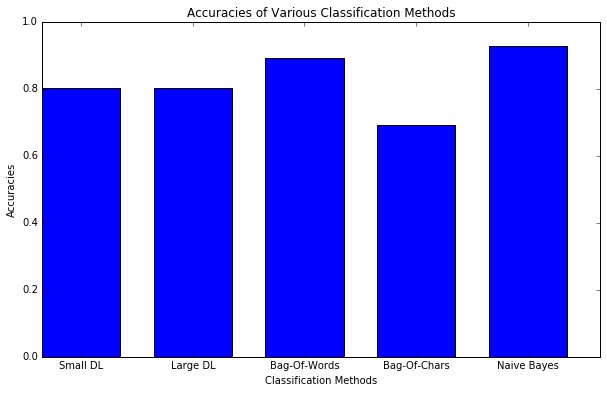

In [15]:
results = [.8016, .8031, .8914, .6921, .9286]
width = 0.7
ind = np.arange(5)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.bar(ind, results, width)

ax.set_ylabel('Accuracies')
ax.set_xlabel('Classification Methods')
ax.set_title('Accuracies of Various Classification Methods')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Small DL', 'Large DL', 'Bag-Of-Words', 'Bag-Of-Chars', 'Naive Bayes'))

plt.show()